# Designing ANN architecture for classifying mnist dataset

# Installation

In [1]:
!sudo pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-83sqft6w
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-83sqft6w
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85445 sha256=c6df149b159b7be56328d9c6c27313fd6df3a673fa10bc65a58721f5594f34d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-6r25k2o_/wheels/44/e5/92/e83049ca00432aec622a4fa0200e254d88aefae9d74aa86941
Successfully built keras-tuner


In [2]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 27.3 MB/s 
     |████████████████████████████████| 135 kB 60.3 MB/s 
     |████████████████████████████████| 1.6 MB 53.0 MB/s 
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


In [3]:
!pip show autokeras

Name: autokeras
Version: 1.0.20
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorflow, pandas, keras-tuner, packaging
Required-by: 


In [4]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import plot_model

#  Image classifier for mnist

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape) 

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


## AutoKeras ImageClassifier
Arguments
- max_trials: Is the number of different networks that will be evaluated
- num_classes: Number of classes in our label, if classes are more than 2 the label must be one-hot encoded
- Overwrite: If False, reloads an existing project of the same name if one is found. Otherwise, overwrites the project.

In [8]:
import autokeras as ak
from autokeras import ImageClassifier

clf = ak.ImageClassifier(num_classes=10,
                         overwrite=True, 
                         max_trials=1)
history=clf.fit(
    x_train,
    y_train,
    validation_split=0.15, epochs=10)

Trial 1 Complete [00h 02m 16s]
val_loss: 0.04008634760975838

Best val_loss So Far: 0.04008634760975838
Total elapsed time: 00h 02m 16s
Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1572 - accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0724 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0588 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0495 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0375 - accuracy: 0.9879
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9890
Epoch 9/10
1875/1875 [========================

# Model evaluation

In [9]:
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0326 - accuracy: 0.9900
[0.03264772519469261, 0.9900000095367432]


## Predictions on test data

In [10]:
predicted_y = clf.predict(x_test)
print(predicted_y)

313/313 [==============================] - 1s 2ms/step
[['7']
 ['2']
 ['1']
 ...
 ['4']
 ['5']
 ['6']]


In [11]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.157161,0.952050
1,0.072353,0.978050
2,0.058778,0.981417
3,0.049545,0.984633
4,0.042944,0.986517
5,0.040541,0.987000
6,0.037516,0.987850
7,0.034007,0.989017
8,0.032273,0.989567
9,0.029814,0.990250


The model reached 99% of accuracy in 10 epochs

# Performance plots

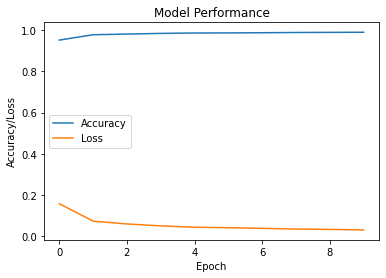

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='center left')
plt.show()

# Classification report

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
predicted_y.astype(np.uint8)

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_y.astype(np.uint8)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

